In [37]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [24]:
dataset = mnist.load_data()

In [25]:
train, test = dataset
X_train, y_train = train
X_test, y_test = test

In [21]:
X_test.shape

(10000, 28, 28)

In [30]:
import matplotlib.pyplot as plt

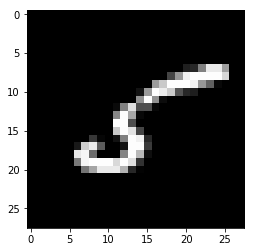

In [163]:
plt.imshow(X_train[11], cmap="gray")
plt.show()

In [55]:
from scipy.stats import bernoulli as coin_flip

In [180]:
points = []

for i in range(28):
    for j in range(28):
        
        if coin_flip.rvs(X_train[11][i][j] / 255) == 1:
            points.append([j, -i])

points = np.array(points)

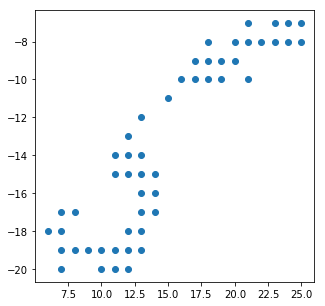

In [181]:
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1])
plt.show()